# tests to retrieve the openEO processed habitat map via UDP
This scripts shows how to paramaterize the UDP to retrieve the habitat map from openEO for given year, topology, topology level. <br>
<br>

In [1]:
import openeo
from eo_processing.utils import laea20km_id_to_extent
from eo_processing.utils.onnx_model_utilities import get_name_output_cube_features
from eo_processing.utils.storage import WEED_storage

In [2]:
# additional imports for visualization and checks
import rasterio
from rasterio.plot import show

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [4]:
terrascope_username = 'deroob' # needed for the Vault access (access to GDrive and S3)
# Note: we are using the standard entry point: "1k27bitdRp41AtHq1xupyqwKaTLzrMUMu"  which represent the openEO folder under WEEDE/Working/WP4_ToolboxDvlpt/openeo_tests
weed_storage = WEED_storage(username=terrascope_username)

Please enter your password for the Terrascope VAULT:  ········


In [18]:
namespace="/home/deroob/Git/OpenEO-UDP-UDF-catalogue/UDP/json/udp_inference_module_alpha1_prototype.json"
s3_model_directory = 'models'
model_urls = weed_storage.get_onnx_urls(s3_directory=s3_model_directory)
#namespace="https://raw.githubusercontent.com/ESA-WEED-project/OpenEO-UDP-UDF-catalogue/refs/heads/main/UDP/json/udp_inference_module_alpha0.json"

In [10]:
#define parameters
param_name = "E468N306"
param_bbox = laea20km_id_to_extent(param_name)
param_year = 2021
param_onnx_models = model_urls
param_output_band_names = get_name_output_cube_features(model_urls)
param_digitalId = "Bert"
param_scenarioId = "CopperNeckMountains"


Loaded ONNX model from /tmp/cache/Level1_class-0_129predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-C_71predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-D_68predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-E_85predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-F_90predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-G_164predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-H_65predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-I_50predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-J_62predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level2_class-X_54predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level3_class-C1_62predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level3_class-C3_62predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level3_class-E1_50predictors_v1.onnx
Loaded ONNX model from /tmp/cache/Level3_class-E2_50predictors_v1.onnx
Loaded ONNX mo

## get the habitat map in EPSG:4326

In [19]:
cube = connection.datacube_from_process(
    process_id="udp_inference_module_alpha1",
    namespace=namespace,
    name = param_name,
    bbox = param_bbox,
    year = param_year,
    onnx_models = param_onnx_models,
    output_band_names = param_output_band_names,
    digitalId = param_digitalId,
    scenarioId = param_scenarioId
    )

In [20]:
job = cube.create_job(title=f'UDP_tests_{param_digitalId}_{param_scenarioId}_{param_name}',
                                    description=f'inference for tile {param_name}')

Preflight process graph validation raised: [ProcessUnsupported] Process with identifier 'udp_inference_module_alpha1' is not available in namespace '/home/deroob/Git/OpenEO-UDP-UDF-catalogue/UDP/json/udp_inference_module_alpha1.json'.


In [ ]:
while job.status() not in ['finished','error']:
    print(f"going to sleep job not yet done: status : {job.status()}")
    sleep(60)

   

In [6]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./SK_habitat_map_L3_10m_EPSG4326.tif')

CPU times: user 40.9 ms, sys: 66 ms, total: 107 ms
Wall time: 1min 39s


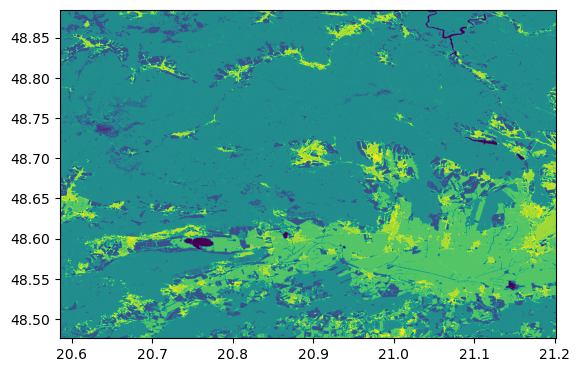

In [7]:
# visu result
with rasterio.open("SK_habitat_map_L3_10m_EPSG4326.tif") as src:
    show(src)

## get the map in EPSG:3035

In [12]:
cube = connection.datacube_from_process(
    process_id="udp_inference_module_alpha0",
    namespace="https://raw.githubusercontent.com/ESA-WEED-project/OpenEO-UDP-UDF-catalogue/refs/heads/main/UDP/json/udp_inference_module_alpha0.json",
    geometry=polygon,
    year=2021,
    topology='EUNIS2012',
    topology_level=3,
    target_epsg=3035,
    target_res=10
    )

In [13]:
%time cube.download(r'./SK_habitat_map_L3_10m_EPSG3035.tif')

CPU times: total: 31.2 ms
Wall time: 4min 43s


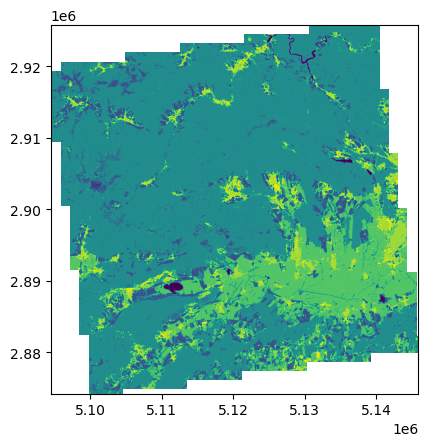

In [10]:
# visu result
with rasterio.open("SK_habitat_map_L3_10m_EPSG3035.tif") as src:
    show(src)

In [9]:
connection.job('j-25011311232740af9327467e643519bb')

OpenEoApiError: [404] JobNotFound: The batch job 'j-25011311232740af9327467e643519bb' does not exist. (ref: r-2501200907214eceb3882a5798231ac0)

<BatchJob job_id='j-25011311232740af9327467e643519bb'>